# Combination of p-Values

The `MultipleTesting` package offers several established methods for combining independent p-values. This becomes of interest in testing a global hypothesis: As an example, we can think of a meta analysis based on a number of studies where each study provides a single p-value pᵢ. Using a method for the combination of all p-values pᵢ, we can derive a global p-value p̃.

## Setting the scene

In [1]:
using MultipleTesting
using Gadfly

While an arbitrarily large number of p-values can be combined, we start with the simplest case for our exploration: The combination of two p-values p₁ and p₂.

In [2]:
p_values = 0.01:0.01:0.99;

For each pair of p₁ and p₂, we compute a global p-value p̃ using different p-value combination methods of the package.

In [3]:
function combine_two_pvalues(p_values, combination_method)
    pc = [combine([p1, p2], combination_method()) for p1 in p_values, p2 in p_values]
end

combine_two_pvalues (generic function with 1 method)

With contour plots, we can gain an understanding of the properties and differences between the approaches.

In [4]:
function plot_combined_pvalues_contour(pc, p_values, combination_method)
    p = plot(z = pc, x = p_values, y = p_values,
             Geom.contour(levels = 0.1:0.1:1.0),
             Guide.xticks(ticks = collect(0:0.2:1)), Guide.yticks(ticks = collect(0:0.2:1)),
             Guide.title(string(combination_method.name.name)),
             Guide.xlabel("p₁"), Guide.ylabel("p₂"),
             Guide.colorkey("p̃"),
             Coord.cartesian(fixed = true))
    f = draw(SVGJS(13cm, 13cm), p)
    return f
end

plot_combined_pvalues_contour (generic function with 1 method)

## Analysis of combination methods

Here, we will be looking closer at four different approaches:
- Fisher's method
- Tippett's method
- Stouffer's method
- the logit method

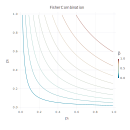

In [5]:
pc = combine_two_pvalues(p_values, FisherCombination)
plot_combined_pvalues_contour(pc, p_values, FisherCombination)

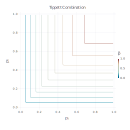

In [6]:
pc = combine_two_pvalues(p_values, TippettCombination)
plot_combined_pvalues_contour(pc, p_values, TippettCombination)

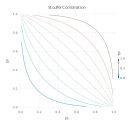

In [7]:
pc = combine_two_pvalues(p_values, StoufferCombination)
plot_combined_pvalues_contour(pc, p_values, StoufferCombination)

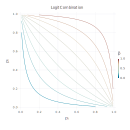

In [8]:
pc = combine_two_pvalues(p_values, LogitCombination)
plot_combined_pvalues_contour(pc, p_values, LogitCombination)